In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

In [4]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import csv
import matplotlib.pyplot as plt
# import os

# Read file and store as a DataFrame
public_arrest_data_to_load = pd.read_csv("Resources/PublicReleaseArrestDataUPDATE.csv")
# crimes_2015_present_to_load = pd.read_csv("Resources/Crimes_2015toPresent.csv")
# fatal_shootings_data_to_load = pd.read_csv('Resources/Fatal_Shootings_Dot_OrgUPDATED.csv',encoding='latin-1')
fatalities_data_to_load = pd.read_csv("Resources/Fatal_complete.csv")

public_arrest_data = pd.DataFrame(public_arrest_data_to_load)
# public_arrest_data.head()
# crimes_2015_present = pd.DataFrame(crimes_2015_present_to_load)
# crimes_2015_present.head()
fatalities_data = pd.DataFrame(fatalities_data_to_load)
# fatal_shootings_data.head()


# merge datasets 
# crime_data_complete = pd.merge(fatalities_shoot_data, , how="left", on=["Date"])
# crime_data_complete
# crime_data_complete.to_csv("Crime_data_complete")


In [5]:
#visualizing both datasets
public_arrest_data.head(2)

,ARR_DISTRICT,ARR_BEAT,ARR_YEAR,ARR_MONTH,RACE_CODE_CD,FBI_CODE,STATUTE,STAT_DESCR,CHARGE_CLASS_CD,CHARGE_TYPE_CD
0,10.0,1033.0,2017,8,BLK,18,720 ILCS 570.0/407-B-1,MFG/DEL COCAINE/SCH/PUB HS/PK,X,F
1,9.0,923.0,2017,8,WWH,WRT,725 ILCS 225.0/13,FUGITIVE FROM JUSTICE - OUT OF STATE WARRANT,Z,NaN


In [6]:
#vizualizing both datasets
# crimes_2015_present.head(2)

In [7]:
# crimes_2015_present.info()

## Crime Summary
- Collect dataset highlights using the crimes_2015_present dataset

In [8]:
# Calculate the total number of unique crime events that happened from 2015 to present (2023)
# total_crimes_count = crimes_2015_present.count()["Date"]
# total_crimes_count

# print(f"There have been a total of {total_crimes_count} crimes registered in Chicago from 2015 to the present.")

In [9]:
# Select all of the different crime description types
# crime_primary_types = crimes_2015_present["Primary Type"].value_counts()
# crime_primary_types.head()

In [10]:
# Select all of the different Location description types
# location_description_types = crimes_2015_present["Location Description"].value_counts()
# location_description_types.head(10)

In [11]:
# Select all of the different Districts
# districts = crimes_2015_present["District"].value_counts()
# districts.head(50)

In [12]:
# Select all of the different FBI Codes
# FBI_codes = crimes_2015_present["FBI Code"].value_counts()
# FBI_codes.head(4)

In [13]:
# Calaculate the top crimes committed per district
# crimes_2015_present["District"]

## Demographic Summary
- Collect dataset highlights using public_arrest_data
- Years 2015 - 2017


In [14]:
# Calculate the total number of unique crime events that took place from 2014-2017 in the public_arrest_data dataset
total_crimes_public_arr_count = public_arrest_data.count()["ARR_YEAR"]
total_crimes_public_arr_count

print(f"There have been a total of {total_crimes_public_arr_count} crimes registered in Chicago from 2014 to 2017, based on Public Release Arrest Dataset.")

There have been a total of 410682 crimes registered in Chicago from 2014 to 2017, based on Public Release Arrest Dataset.


In [15]:
# WHAT IS THE ARREST COUNT PER DISTRICT?
total_arrests_per_distrct = public_arrest_data["ARR_DISTRICT"].value_counts()
total_arrests_per_distrct.head(2)

# WHICH 2 DISTRICTS HAVE THE HIGHEST COUNT OF ARRESTS?
print(f"Districts 11 and 7 have the highest number of arrests in the city of Chicago during 2014-2017.")

Districts 11 and 7 have the highest number of arrests in the city of Chicago during 2014-2017.


In [16]:
# WHICH 2 DISTRICTS HAVE THE LOWEST COUNT OF ARRESTS?
total_arrests_per_distrct = public_arrest_data["ARR_DISTRICT"].value_counts()
total_arrests_per_distrct.tail(2)
print(f"Districts 17 and 20 have the lowest number of arrests in the city of Chicago during 2014-2017.")

Districts 17 and 20 have the lowest number of arrests in the city of Chicago during 2014-2017.


In [17]:
# WHAT IS THE TOTAL ARREST COUNT, PER RACE?
total_arrests_per_race = public_arrest_data[public_arrest_data['RACE_CODE_CD'].notnull() ].groupby('ARR_YEAR').size()
total_arrests_per_race


ARR_YEAR
2014    128603
2015    112574
2016     85805
2017     83700
dtype: int64

In [18]:
#count the number of arrests by race
total_arrests_by_race = public_arrest_data.groupby('RACE_CODE_CD').size()
total_arrests_by_race

RACE_CODE_CD
API      2375
BLK    298318
I         293
U         635
WBH      2417
WHI     34647
WWH     71997
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

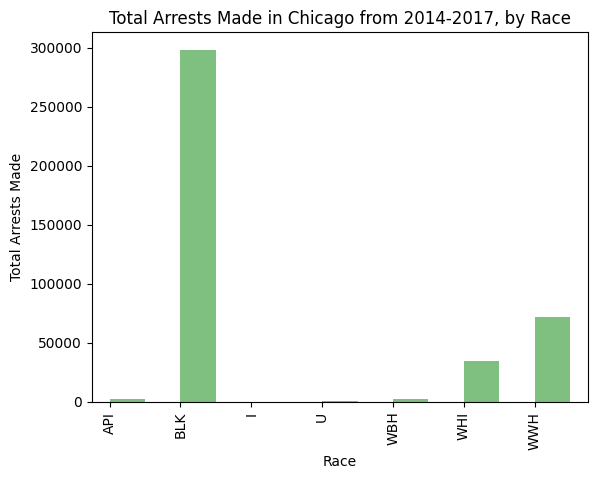

In [19]:

#plot the number of arrests by race
total_arrests_by_race.plot(kind='bar', color= 'g', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.xlabel("Race")
plt.ylabel("Total Arrests Made")
# plt.legend("Race")
plt.title("Total Arrests Made in Chicago from 2014-2017, by Race")
plt.show

In [20]:
# race = ('API', 'BLK', 'I', 'U', 'WBH', 'WHI', 'WWH')
# arrest_counts = 

## Demographic Summary
- Collect dataset highlights using fatalities_data
- Years 2015-2023


In [21]:
# Calculate the total number of unique shooting fatality events that took place from 2015 to present (2023) in the fatalities_shoot_data
total_fatalities = fatalities_data.count()["Date"]
total_fatalities

print(f"There have been a total of {total_fatalities} shooting fatalities registered in the city of Chicago from 2015 to the present, based on Fatalities Dataset.")

There have been a total of 115 shooting fatalities registered in the city of Chicago from 2015 to the present, based on Fatalities Dataset.


In [22]:
# WHAT IS THE ARREST COUNT PER ZIP CODE?
total_fatalities_per_zip = fatalities_data["Location of death (zip code)"].value_counts()
total_fatalities_per_zip

# WHICH 2 DISTRICTS HAVE THE HIGHEST COUNT OF ARRESTS?
# print(f"Districts 11 and 7 have the highest number of arrests in the city of Chicago during 2014-2017.")

60628    10
60624     8
60623     8
60644     7
60636     7
60620     7
60651     6
60649     6
60637     5
60639     5
60621     4
60617     4
60608     3
60632     3
60609     3
60659     3
60619     3
60638     2
60641     2
60606     2
60618     2
60612     2
60616     2
60653     1
60610     1
68135     1
60655     1
60613     1
60654     1
60657     1
60804     1
60629     1
60607     1
60645     1
Name: Location of death (zip code), dtype: int64

In [23]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# African-American/Black
total_AA_fatalities_year = fatalities_data[fatalities_data['Race'] == 'African-American/Black'].groupby('Year').size()
total_AA_fatalities_year

Year
2015    14
2016    13
2017    11
2018    10
2019    12
2020     9
2021     6
dtype: int64

In [26]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# Asian/Pacific Islander
total_API_fatalities_year = fatalities_data[fatalities_data['Race'] == 'Asian/Pacific Islander'].groupby('Year').size()
total_API_fatalities_year

Year
2020    1
dtype: int64

In [27]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# European-American/White
total_WH_fatalities_year = fatalities_data[fatalities_data['Race'] == 'European-American/White'].groupby('Year').size()
total_WH_fatalities_year

Year
2016    1
2017    1
2018    3
2021    1
dtype: int64

In [28]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# Hispanic/Latino
total_HIS_fatalities_year = fatalities_data[fatalities_data['Race'] == 'Hispanic/Latino'].groupby('Year').size()
total_HIS_fatalities_year

Year
2015    3
2017    3
2018    1
2020    5
2021    4
dtype: int64

In [29]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# Middle Eastern
total_MIDE_fatalities_year = fatalities_data[fatalities_data['Race'] == 'Middle Eastern'].groupby('Year').size()
total_MIDE_fatalities_year

Year
2019    1
dtype: int64

In [30]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# Race Unspecified
total_UNS_fatalities_year = fatalities_data[fatalities_data['Race'] == 'Race unspecified'].groupby('Year').size()
total_UNS_fatalities_year

Year
2016    2
2017    3
2018    1
2019    3
2020    6
2021    1
dtype: int64

In [31]:
#Create a dataframe containing fatilities per race by year
all_races_fatalities = pd.DataFrame({
    "African-American/Black": total_AA_fatalities_year,
    "Asian/Pacific Islander": total_API_fatalities_year,
    "European-American/White": total_WH_fatalities_year,
    "Hispanic/Latino": total_HIS_fatalities_year,
    "Middle Eastern": total_MIDE_fatalities_year,
    "Race unspecified": total_UNS_fatalities_year
})

all_races_fatalities

,African-American/Black,Asian/Pacific Islander,European-American/White,Hispanic/Latino,Middle Eastern,Race unspecified
Year,,,,,,
2015,14,NaN,NaN,3.0,NaN,NaN
2016,13,NaN,1.0,NaN,NaN,2.0
2017,11,NaN,1.0,3.0,NaN,3.0
2018,10,NaN,3.0,1.0,NaN,1.0
2019,12,NaN,NaN,NaN,1.0,3.0
2020,9,1.0,NaN,5.0,NaN,6.0
2021,6,NaN,1.0,4.0,NaN,1.0


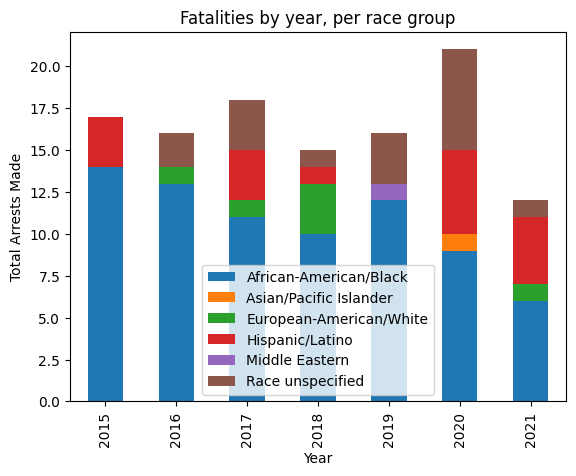

In [39]:
#plot a stacked bar chart uning matplotlib
all_races_fatalities.plot(kind='bar', stacked=True, title='Fatalities by year, per race group')
plt.xlabel("Year")
plt.ylabel("Total Arrests Made")
plt.show()